# **CS 159 Lecture 8**

This notebook samples random MLPs and plots a scatterplot of network outputs for two fixed inputs.

## Imports

In [ ]:
import math
import numpy as np
from tqdm.notebook import tqdm

import torch, torchvision
import torch.nn as nn
import torch.nn.functional as F

%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('font', size=16)
plt.rc('axes', titlesize=16)
plt.rc('axes', labelsize=16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)
plt.rc('legend', title_fontsize=16)
plt.rc('legend', fontsize=16)
plt.rc('figure', titlesize=16)

## Define MLP

In [ ]:
class MLP(nn.Module):
    def __init__(self, depth, width):
        super(MLP, self).__init__()

        self.initial = nn.Linear(3072, width, bias=False)
        self.layers = nn.ModuleList([nn.Linear(width, width, bias=False) for _ in range(depth-2)])
        self.final = nn.Linear(width, 1, bias=False)

    def forward(self, x):
        x = self.initial(x)
        x = F.relu(x) * math.sqrt(2)
        for layer in self.layers:
            x = layer(x)
            x = F.relu(x) * math.sqrt(2)
        return self.final(x)

## Get a CIFAR-10 input and add noise






Extracting ./data/cifar-10-python.tar.gz to ./data


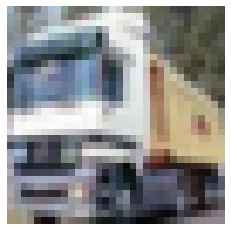

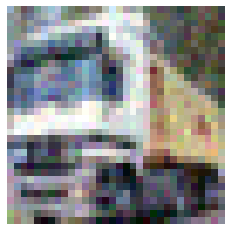

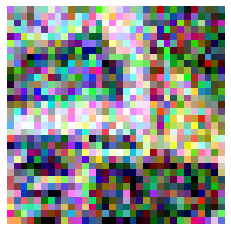

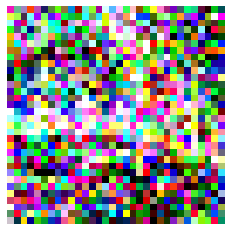

In [ ]:
trainset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=torchvision.transforms.ToTensor())

image = trainset[1][0].permute(1,2,0).clamp_(0,1)

# create noisy images
image_ = (image + torch.randn_like(image)*0.05).clamp_(0,1)
image__ = (image + torch.randn_like(image)*0.25).clamp_(0,1)
image___ = (image + torch.randn_like(image)*0.5).clamp_(0,1)

# plot images
plt.axis('off'); plt.imshow(image); plt.savefig('truck.png', bbox_inches='tight'); plt.show()
plt.axis('off'); plt.imshow(image_); plt.savefig('truck_.png', bbox_inches='tight'); plt.show()
plt.axis('off'); plt.imshow(image__); plt.savefig('truck__.png', bbox_inches='tight'); plt.show()
plt.axis('off'); plt.imshow(image___); plt.savefig('truck___.png', bbox_inches='tight'); plt.show()

# flatten images to pass through MLP
image = image.flatten().unsqueeze(0)
image_ = image_.flatten().unsqueeze(0)
image__ = image__.flatten().unsqueeze(0)
image___ = image___.flatten().unsqueeze(0)

# concatenate into single batch
input = torch.cat((image,image_,image__,image___), 0)

# rescale inputs to get a well scaled output
input /= input.norm(dim=1, keepdim=True) 
input *= math.sqrt(input.shape[1])

## Sample random MLPs and pass the input through

In [ ]:
net = MLP(width=1000,depth=3)

print("The network matrices have shapes:\n")
for p in net.parameters():
    print(p.shape)

print("\nSampling random networks...\n")

output = []
output_ = []
output__ = []
output___ = []

for _ in tqdm(range(1000)):
    
    # randomly sample network weights
    for p in net.parameters():
        p.data = torch.randn_like(p) / math.sqrt(p.shape[1])
    
    # pass input through network
    out = net(input).squeeze().detach()
    
    # log outputs for each input image
    output.append(out[0])
    output_.append(out[1])
    output__.append(out[2])
    output___.append(out[3])

The network matrices have shapes:

torch.Size([1000, 3072])
torch.Size([1000, 1000])
torch.Size([1, 1000])

Sampling random networks...



## Plot scatterplots

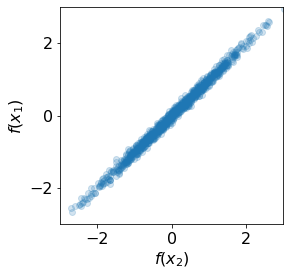

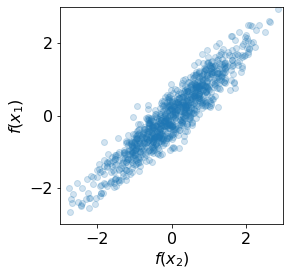

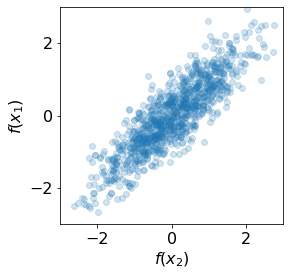

In [ ]:
def scatterplot(x1,x2,name):
    plt.figure(figsize=(4,4))
    plt.scatter(x1, x2, alpha=0.2)
    
    plt.xlabel(r"$f(x_2)$")
    plt.ylabel(r"$f(x_1)$")

    plt.xlim(-3,3)
    plt.ylim(-3,3)

    plt.yticks([-2,0,2])
    
    plt.savefig(name+'.png', bbox_inches='tight')
    plt.show()

scatterplot(output_, output, 'output_')
scatterplot(output__, output, 'output__')
scatterplot(output___, output, 'output___')